In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

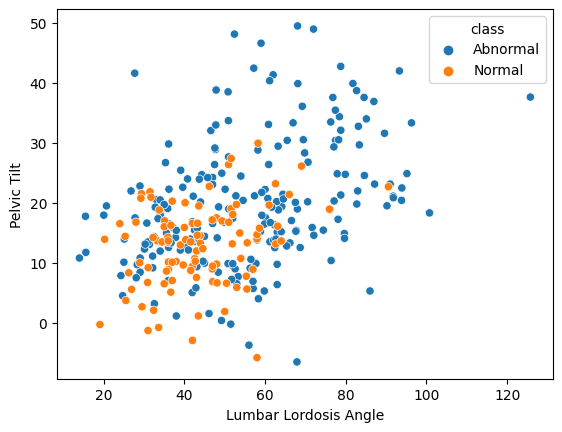

In [3]:
df = pd.read_csv('biomechanical_properties_of_patients.csv')
sns.scatterplot(data=df, x='lumbar_lordosis_angle', y='pelvic_tilt numeric', hue='class')
plt.xlabel('Lumbar Lordosis Angle')
plt.ylabel('Pelvic Tilt')
plt.show()

In [4]:
df['class'] = [1 if each == 'Abnormal' else 0 for each in df['class']]
y = df['class'].values
x_data = df.drop(['class'], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values #This method rescales the range of the data to [0,1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=42) #%15 to test


In [6]:
neighbors = 4
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train) #Fit the k-nearest neighbors classifier from the training dataset.

prediction = knn.predict(x_test) #Predict the class labels for the provided data.
print(neighbors,knn.score(x_test,y_test)) #Return the mean accuracy on the given test data and labels.

4 0.7446808510638298


[0.7446808510638298, 0.723404255319149, 0.7872340425531915, 0.7446808510638298, 0.7872340425531915, 0.7872340425531915, 0.723404255319149, 0.7872340425531915, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7872340425531915, 0.8085106382978723, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7446808510638298, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7659574468085106, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7872340425531915, 0.7659574468085106, 0.7872340425531915, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915]


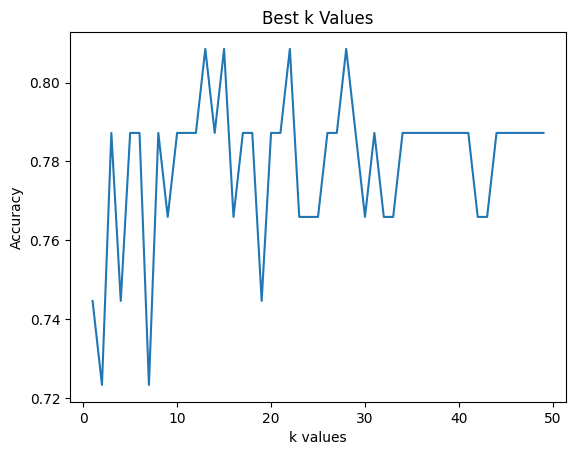

In [8]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50), score_list)
print(score_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Best k Values')
plt.show()